# Анализ задачи трех кругов

In [33]:
import subprocess # run shell commands

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme("paper")

Будем производить запуски двух отдельных программ:

1. Запускается с параметром `n` и заданными окружностями. Проверят по широкой области, в которую входят все три окружности.
2. Запускается с параметром `n`, заданными окружностями и границами прямоугольной области генерации точек. Будем задавать максимально прилегающую к действительному пересечению область.

## Подготавливаем параметры

In [4]:
# circle is a tuple of (x, y, r)

circles = [
    (1, 1, 1),
    (1.5, 2, np.sqrt(5) / 2),
    (2, 1.5, np.sqrt(5) / 2),
]

x_min, x_max = 0.87, 2.01
y_min, y_max = 0.87, 2.01

circles

[(1, 1, 1), (1.5, 2, 1.118033988749895), (2, 1.5, 1.118033988749895)]

In [5]:
actual_area = 0.25 * np.pi + 1.25 * np.arcsin(0.8) - 1
actual_area

0.9445171858994637

## Запуск алгоритма на C++

In [ ]:
results_lst = []

for n in range(100, 100000, 500):
    input_wide = f"""{n}
{circles[0][0]} {circles[0][1]} {circles[0][2]}
{circles[1][0]} {circles[1][1]} {circles[1][2]}
{circles[2][0]} {circles[2][1]} {circles[2][2]}
"""
    
    # wide_bounds should be compiled
    result_wide = subprocess.run(["./wide_bounds/bin/main"], input=input_wide, text=True, capture_output=True)

    input_narrow = f"""{input_wide}
{x_min} {x_max} {y_min} {y_max}
"""
    
    # custom_bounds should be compiled
    result_narrow = subprocess.run(["./custom_bounds/bin/main"], input=input_narrow, text=True, capture_output=True)

    results_lst.append((n, np.float64(result_wide.stdout), np.float64(result_narrow.stdout)))

results_lst[5:10]

[(2600, 0.923603, 0.949208),
 (3100, 0.915762, 0.94745),
 (3600, 0.926304, 0.947625),
 (4100, 0.92716, 0.950927),
 (4600, 0.92783, 0.950403)]

In [11]:
results_df = pd.DataFrame(results_lst, columns=["n", "area_wide", "area_narrow"])
results_df

,n,area_wide,area_narrow
0,100,0.777771,0.883728
1,600,0.826382,0.935712
2,1100,0.857316,0.955797
3,1600,0.874992,0.956830
4,2100,0.888881,0.946851
...,...,...,...
195,97600,0.943027,0.943901
196,98100,0.943870,0.943965
197,98600,0.945394,0.943950
198,99100,0.944254,0.943725


## Построение графиков первого типа

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

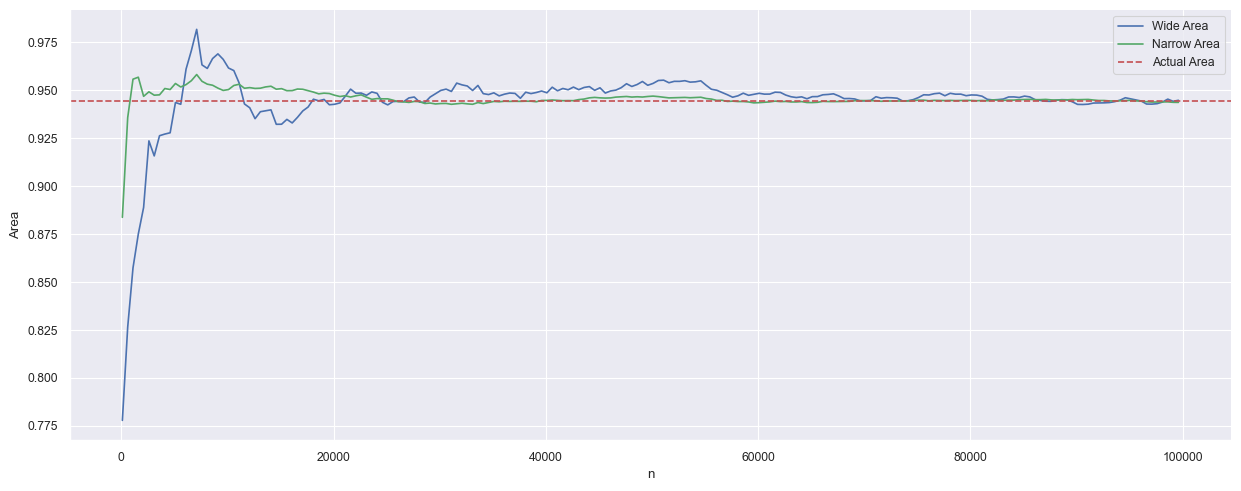

In [49]:
plot = sns.relplot(data=results_df, x="n", y="area_wide", kind='line', height=5, aspect=2.5, label='Wide Area')
sns.lineplot(data=results_df, x="n", y="area_narrow", ax=plot.ax, label='Narrow Area', color='g')
plot.ax.axhline(y=actual_area, color='r', linestyle='--', label='Actual Area')
plot.set_axis_labels("n", "Area")
plot.ax.legend()
plot.savefig("static/area.png")


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

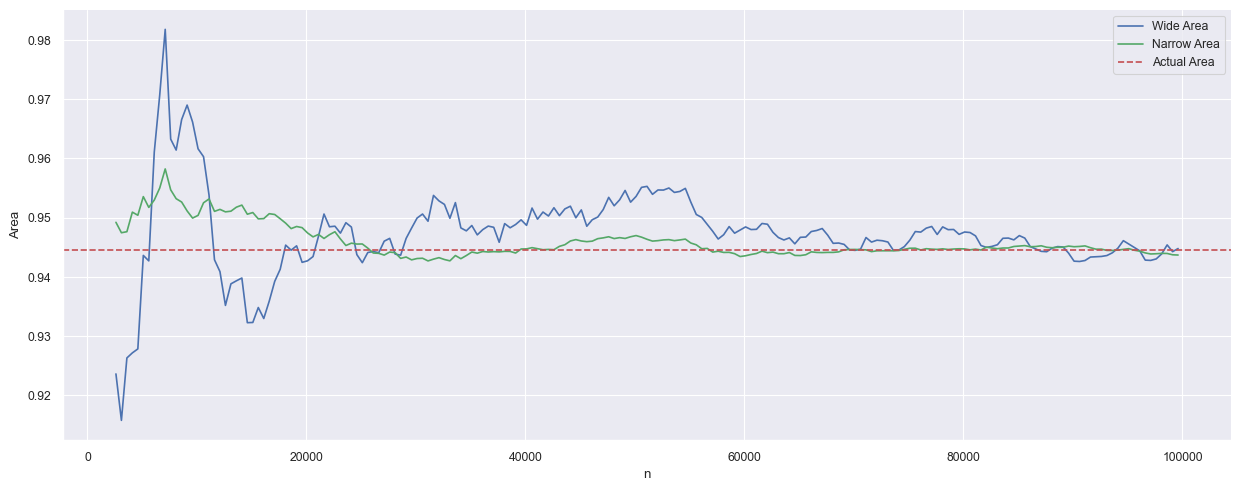

In [48]:
# Remove first two results - outliers

plot = sns.relplot(data=results_df[5:], x="n", y="area_wide", kind='line', height=5, aspect=2.5, label='Wide Area')
sns.lineplot(data=results_df[5:], x="n", y="area_narrow", ax=plot.ax, label='Narrow Area', color='g')
plot.ax.axhline(y=actual_area, color='r', linestyle='--', label='Actual Area')
plot.set_axis_labels("n", "Area")
plot.ax.legend()
plot.savefig("static/area_reduced.png")

## Построение графиков второго типа

In [39]:
results_df["relative_error_wide"] = np.abs(results_df["area_wide"] - actual_area) / actual_area
results_df["relative_error_narrow"] = np.abs(results_df["area_narrow"] - actual_area) / actual_area
results_df

,n,area_wide,area_narrow,relative_error_wide,relative_error_narrow
0,100,0.777771,0.883728,0.176541,0.064360
1,600,0.826382,0.935712,0.125075,0.009322
2,1100,0.857316,0.955797,0.092324,0.011942
3,1600,0.874992,0.956830,0.073609,0.013036
4,2100,0.888881,0.946851,0.058904,0.002471
...,...,...,...,...,...
195,97600,0.943027,0.943901,0.001578,0.000652
196,98100,0.943870,0.943965,0.000685,0.000585
197,98600,0.945394,0.943950,0.000928,0.000601
198,99100,0.944254,0.943725,0.000279,0.000839


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

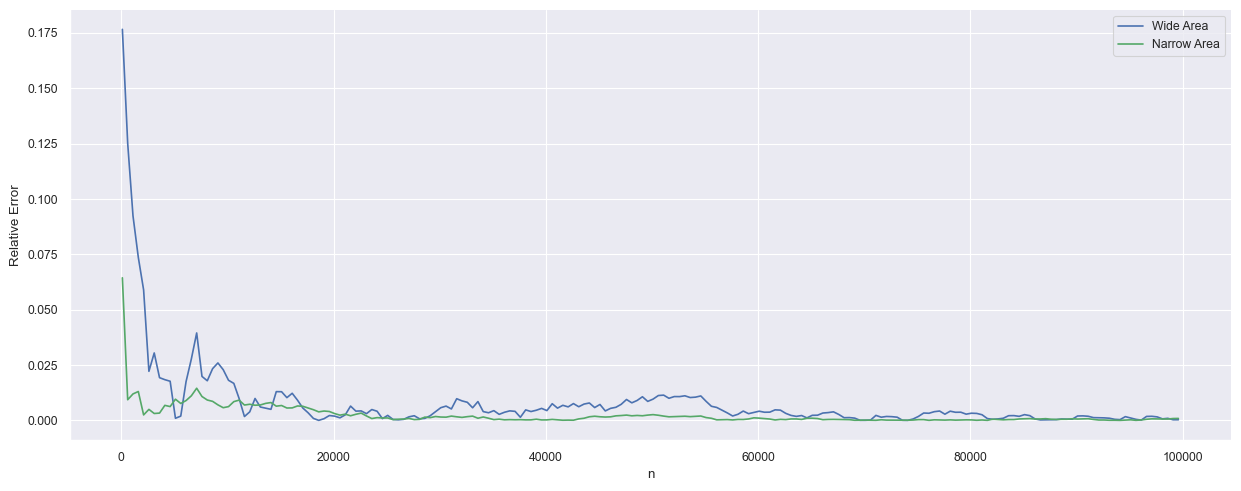

In [51]:
plot = sns.relplot(data=results_df, x="n", y="relative_error_wide", kind='line', height=5, aspect=2.5, label='Wide Area')
sns.lineplot(data=results_df, x="n", y="relative_error_narrow", ax=plot.ax, label='Narrow Area', color='g')
plot.set_axis_labels("n", "Relative Error")
plot.ax.legend()
plot.savefig("static/relative_error.png")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

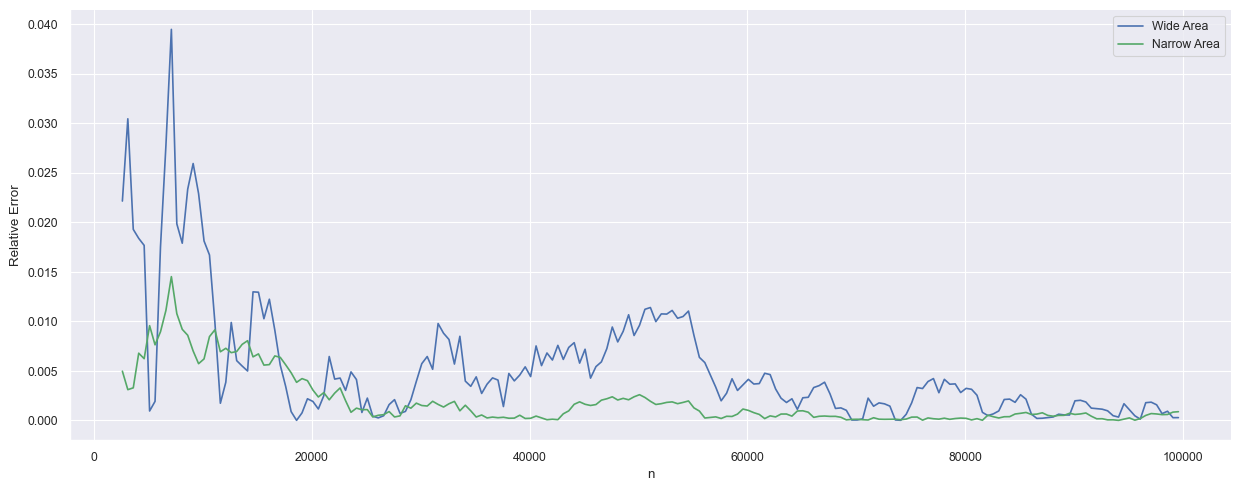

In [52]:
# Remove first two results - outlier

plot = sns.relplot(data=results_df[5:], x="n", y="relative_error_wide", kind='line', height=5, aspect=2.5, label='Wide Area')
sns.lineplot(data=results_df[5:], x="n", y="relative_error_narrow", ax=plot.ax, label='Narrow Area', color='g')
plot.set_axis_labels("n", "Relative Error")
plot.ax.legend()
plot.savefig("static/relative_error_reduced.png")

## Экспорт данных

In [53]:
results_df.to_csv("static/results.csv", index=False)